### First work through the tutorial for "Regression" modeling
### Then use the "Credit Default" dataset for "Classification" modeling

In [1]:
#importing Scikit, numpy, pandas, math, matplotlib

import numpy as np
import pandas as pd
import scipy
from math import sqrt
import matplotlib.pyplot as plt


In [2]:
#import Estimators, Metrics and Cross Validation

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import linear_model

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import train_test_split

In [3]:
# load the input data

rawData = pd.read_csv('default of credit card clients.csv', header =1)
rawData.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6               

In [5]:
age15 = rawData.iloc[1,5]
print (age15)

26


In [6]:
ageFull = rawData['AGE']
ageFull.head()

0    24
1    26
2    34
3    37
4    57
Name: AGE, dtype: int64

In [7]:
age_pay0_pay2 = rawData.iloc[:,5:8]
age_pay0_pay2.head()

,AGE,PAY_0,PAY_2
0,24,2,2
1,26,-1,2
2,34,0,0
3,37,0,0
4,57,-1,0


In [8]:
# select independent attributes

features = rawData.iloc[:,12:23]
print ("Summary of feature sample")
features.head()

Summary of feature sample


,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5
0,3913,3102,689,0,0,0,0,689,0,0,0
1,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0
2,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000
3,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069
4,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689


In [9]:
# Select the dependent variable

depVar = rawData['PAY_AMT6']

In [10]:
# Training Set (Feature space: X training)

X_train = features[:1000]
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
BILL_AMT1    1000 non-null int64
BILL_AMT2    1000 non-null int64
BILL_AMT3    1000 non-null int64
BILL_AMT4    1000 non-null int64
BILL_AMT5    1000 non-null int64
BILL_AMT6    1000 non-null int64
PAY_AMT1     1000 non-null int64
PAY_AMT2     1000 non-null int64
PAY_AMT3     1000 non-null int64
PAY_AMT4     1000 non-null int64
PAY_AMT5     1000 non-null int64
dtypes: int64(11)
memory usage: 86.0 KB


In [11]:
# Dependent Variable Training Set (y training)

y_train = depVar[:1000]
y_train_count = len(y_train.index)
print("Number of observations in y Training set = ",str(y_train_count))

Number of observations in y Training set =  1000


In [12]:
# Test set for X and y ie X_test and y_test

X_test = features[-100:]
y_test = depVar[-100:]
X_test_count = len(X_test.index)
y_test_count = len(y_test.index)
print ("Xtest length is = ", str(X_test.index))
print ("ytest length is = ", str(y_test.index))

Xtest length is =  RangeIndex(start=29900, stop=30000, step=1)
ytest length is =  RangeIndex(start=29900, stop=30000, step=1)


In [13]:
# automated method to create X_train, X_test, y_train and y_test using cross validation

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train)
X_train.shape, X_test.shape

((750, 11), (250, 11))

In [14]:
# Import model estimator

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import linear_model

# Create models

modelSVR = SVR()
modelRF = RandomForestRegressor()
modelLR = LinearRegression()

# Pass the training data to each model to fit the data to the model

modelSVR.fit(X_train, y_train)
modelRF.fit(X_train, y_train)
modelLR.fit(X_train, y_train)




C:\Users\RAJPC\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\RAJPC\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
from sklearn.model_selection import cross_val_score

print(cross_val_score(modelRF, X_train, y_train))
print(cross_val_score(modelSVR, X_train, y_train))
print(cross_val_score(modelLR, X_train, y_train))

C:\Users\RAJPC\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


[ 0.0938226   0.00422903 -0.05501019]
[-0.04850793 -0.0325798  -0.02960289]
[-1.65071462 -0.89256369  0.28872029]


C:\Users\RAJPC\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\RAJPC\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\RAJPC\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\RAJPC\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto'

In [16]:
# RF model

modelRF.fit(X_train, y_train)
print(cross_val_score(modelRF, X_train, y_train))
modelRF.score(X_train, y_train)

[ 0.00647136 -0.0116823   0.10380597]


C:\Users\RAJPC\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.91195253533425

In [17]:
# SVR model

modelSVR.fit(X_train, y_train)
print(cross_val_score(modelSVR, X_train, y_train))
modelSVR.score(X_train, y_train)

C:\Users\RAJPC\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\RAJPC\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\RAJPC\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\RAJPC\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto'

[-0.04850793 -0.0325798  -0.02960289]


-0.02662622055686925

In [18]:
# LR model

modelLR.fit(X_train, y_train)
print(cross_val_score(modelLR, X_train, y_train))
modelLR.score(X_train, y_train)

[-1.65071462 -0.89256369  0.28872029]


C:\Users\RAJPC\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.5543606189716004

In [19]:
# Predict using the models

predictions = modelRF.predict(X_test)
predRsquared = r2_score(y_test,predictions)
rmse = sqrt(mean_squared_error(y_test, predictions))
print ('R squared: ', predRsquared)
print ('RMSE: ', rmse)

R squared:  -0.9587427367235384
RMSE:  9347.31050842264


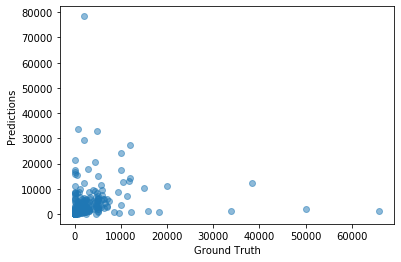

In [20]:
plt.scatter(y_test, predictions, alpha=0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show()

#  1.  Start  Analysis and Model Generation for  "Default" data using "Classification models"

In [21]:
# Load Raw Data

credit = pd.read_csv('default of credit card clients.csv', header =1)
credit.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [22]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6               

# 2. Cleaning and Pre-processing:
1. Check for null and take actions if Null data is present
2. Remove "Index" column since it does not add value

In [23]:
# Check for Null

print (credit.isnull().sum()) ## will print count of missing values for each column

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64


In [24]:
 # No null data based on "isnull" function check

In [25]:
# Remove Index ID attribute and save it in a new dataframe called credit_mod
credit_mod = credit.drop(["ID"],axis=1,inplace=False)  # axis =1 for column, and inplace=False to prevent overwrite
credit_mod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6                     30000 non-null int64
PAY_AMT1                

#  3. EDA Analysis

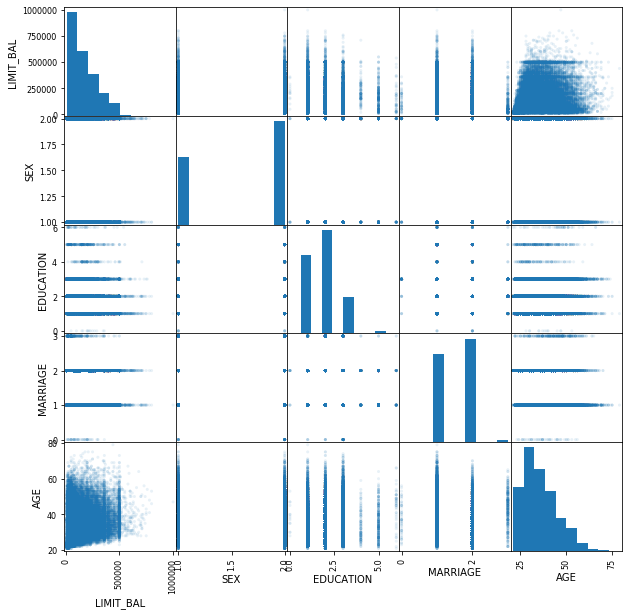

In [26]:
# using EDA plot examples from "benalexkeen.com/scatter-matrices-using-pandas/"

test = credit_mod.iloc[0:30000,0:5]
pd.plotting.scatter_matrix(test,alpha=0.1,figsize=(10,10))
plt.show()

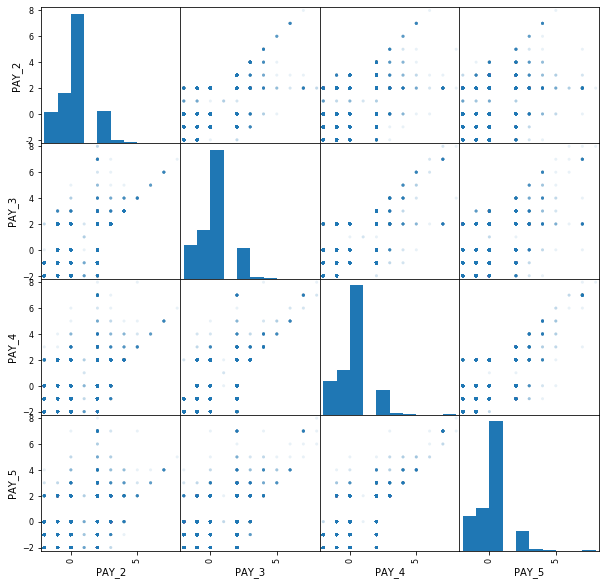

In [27]:
test = credit_mod.iloc[0:30000,6:10]
pd.plotting.scatter_matrix(test,alpha=0.1,figsize=(10,10))
plt.show()

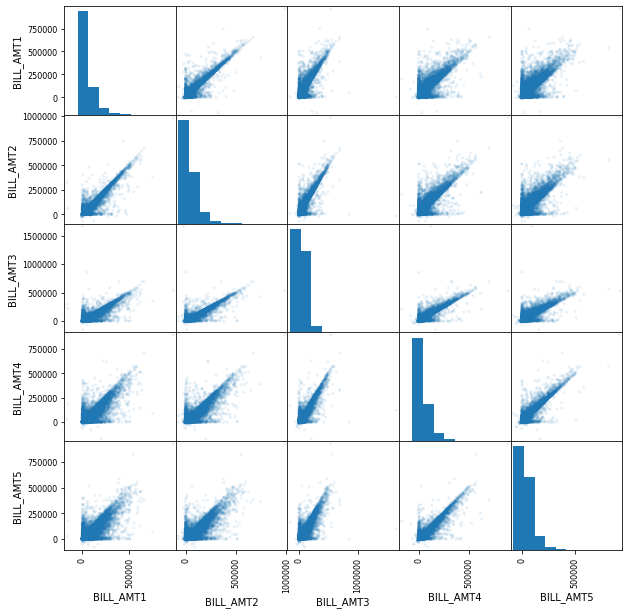

In [28]:
test = credit_mod.iloc[0:30000,11:16]
pd.plotting.scatter_matrix(test,alpha=0.1,figsize=(10,10))
plt.show()

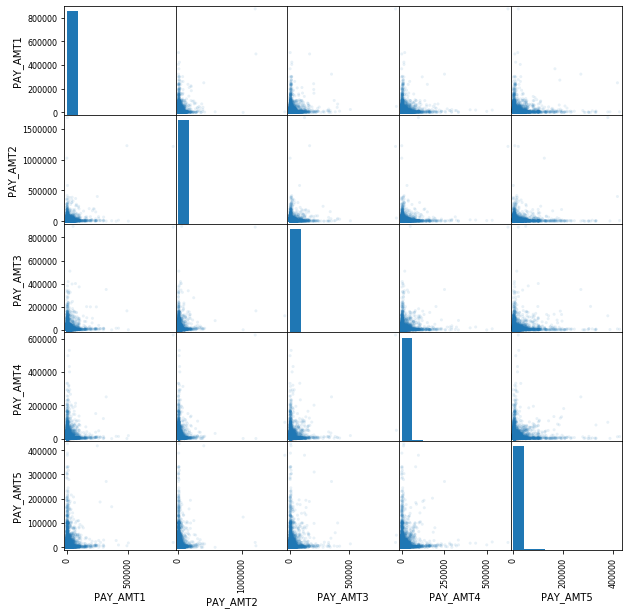

In [29]:
test = credit_mod.iloc[0:30000,17:22]
pd.plotting.scatter_matrix(test,alpha=0.1,figsize=(10,10))
plt.show()

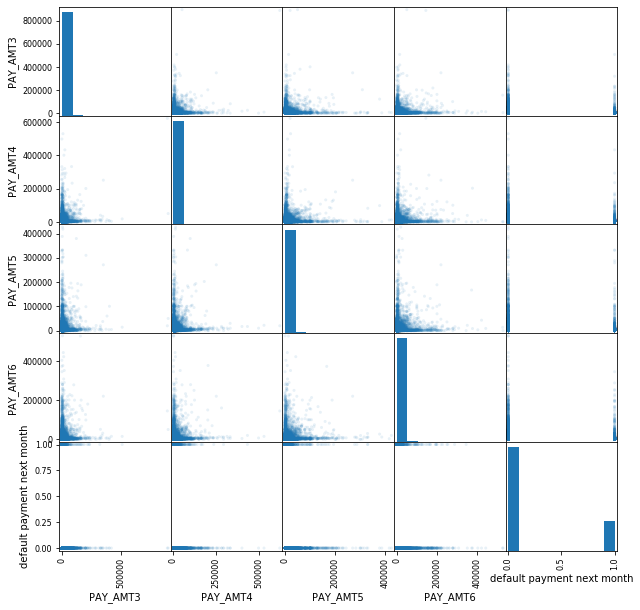

In [30]:
test = credit_mod.iloc[:,19:24]
pd.plotting.scatter_matrix(test,alpha=0.1,figsize=(10,10))
plt.show()

# 4. One Hot encoding for Categorical attributes

In [31]:
# Create dummy variables for categorial attributes and then concatenate to original dataset

credit_mod=pd.get_dummies(credit_mod, columns=['SEX','EDUCATION','MARRIAGE','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6'])


In [32]:
credit_mod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 92 columns):
LIMIT_BAL                     30000 non-null int64
AGE                           30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6                     30000 non-null int64
PAY_AMT1                      30000 non-null int64
PAY_AMT2                      30000 non-null int64
PAY_AMT3                      30000 non-null int64
PAY_AMT4                      30000 non-null int64
PAY_AMT5                      30000 non-null int64
PAY_AMT6                      30000 non-null int64
default payment next month    30000 non-null int64
SEX_1                         30000 non-null uint8
SEX_2                         30000 non-null uint8
EDUCATION_0             

# 5. Correlation and Covariance Estimation to avoid collinearity and overfitting
1. Look for attributes having very high correlation with  dependent variable to avoid overfitting
2. Look for very high covariance or correlation between 2 independent variables and remove one of them to avoid collinearity

In [33]:
corrMat = credit_mod.corr()
corrMatDependent = (round(corrMat['default payment next month'],2))
print(corrMatDependent)

LIMIT_BAL                    -0.15
AGE                           0.01
BILL_AMT1                    -0.02
BILL_AMT2                    -0.01
BILL_AMT3                    -0.01
BILL_AMT4                    -0.01
BILL_AMT5                    -0.01
BILL_AMT6                    -0.01
PAY_AMT1                     -0.07
PAY_AMT2                     -0.06
PAY_AMT3                     -0.06
PAY_AMT4                     -0.06
PAY_AMT5                     -0.06
PAY_AMT6                     -0.05
default payment next month    1.00
SEX_1                         0.04
SEX_2                        -0.04
EDUCATION_0                  -0.01
EDUCATION_1                  -0.05
EDUCATION_2                   0.04
EDUCATION_3                   0.03
EDUCATION_4                  -0.03
EDUCATION_5                  -0.04
EDUCATION_6                  -0.01
MARRIAGE_0                   -0.01
MARRIAGE_1                    0.03
MARRIAGE_2                   -0.03
MARRIAGE_3                    0.01
PAY_0_-2            

In [34]:
# identify correlation > 0.90 

allfeatures = corrMat.columns
for i in range(0, len(corrMatDependent)):
    if corrMatDependent[i] >= 0.90:
        print (allfeatures[i],"= ",corrMatDependent[i])


default payment next month =  1.0


In [35]:
# identify correlation > 0.10 
allfeatures = corrMat.columns
for i in range(0, len(corrMatDependent)):
    if corrMatDependent[i] >= 0.10:
        print (allfeatures[i],"= ",corrMatDependent[i])

default payment next month =  1.0
PAY_0_1 =  0.11
PAY_0_2 =  0.35
PAY_0_3 =  0.13
PAY_2_2 =  0.31
PAY_2_3 =  0.1
PAY_3_2 =  0.27
PAY_4_2 =  0.25
PAY_5_2 =  0.24
PAY_6_2 =  0.22


In [36]:
# None of the independent variable has high correlation with Dependent variable
# Now, find covariance and identify independent varaibles that have zero variance or near zero variance

covMat = credit_mod.cov()
covMat.to_csv('covMat.csv')
print(round(covMat,2))

                               LIMIT_BAL        AGE     BILL_AMT1  \
LIMIT_BAL                   1.683446e+10  173076.72  2.727020e+09   
AGE                         1.730767e+05      84.97  3.817293e+04   
BILL_AMT1                   2.727020e+09   38172.93  5.422240e+09   
BILL_AMT2                   2.570130e+09   35613.66  4.986670e+09   
BILL_AMT3                   2.548533e+09   34334.25  4.556511e+09   
BILL_AMT4                   2.453926e+09   30453.11  4.075286e+09   
BILL_AMT5                   2.331481e+09   27654.07  3.714795e+09   
BILL_AMT6                   2.243837e+09   26137.65  3.519876e+09   
PAY_AMT1                    4.195711e+08    3992.04  1.710894e+08   
PAY_AMT2                    5.333504e+08    4626.86  1.685692e+08   
PAY_AMT3                    4.801180e+08    4746.82  2.034048e+08   
PAY_AMT4                    4.131202e+08    3087.32  1.826164e+08   
PAY_AMT5                    4.305657e+08    3218.05  1.879091e+08   
PAY_AMT6                    5.0651

In [37]:
# Based on the covariance review, drop the following attributes to avoid collinearity/overfitting.
# "BILL_AMT2","BILL_AMT4","BILL_AMT6","PAY_4_7","PAY_0_8","PAY_2_7"

credit_short = credit_mod.drop(["BILL_AMT2","BILL_AMT4","BILL_AMT6","PAY_4_7","PAY_0_8","PAY_2_7"],axis=1,inplace=False) 
credit_short.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 86 columns):
LIMIT_BAL                     30000 non-null int64
AGE                           30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
PAY_AMT1                      30000 non-null int64
PAY_AMT2                      30000 non-null int64
PAY_AMT3                      30000 non-null int64
PAY_AMT4                      30000 non-null int64
PAY_AMT5                      30000 non-null int64
PAY_AMT6                      30000 non-null int64
default payment next month    30000 non-null int64
SEX_1                         30000 non-null uint8
SEX_2                         30000 non-null uint8
EDUCATION_0                   30000 non-null uint8
EDUCATION_1                   30000 non-null uint8
EDUCATION_2                   30000 non-null uint8
EDUCATION_3             

# 6.  Feature Engineering (Recursive Feature Elimination)

In [38]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
myDTC = DecisionTreeClassifier(max_depth=5)
#rank all features ie continue the elimination until the last one
myRFE = RFE(myDTC,n_features_to_select=1)
myRFE.fit(credit_short[0:30000],credit_short['default payment next month'])

RFE(estimator=DecisionTreeClassifier(class_weight=None, criterion='gini',
                                     max_depth=5, max_features=None,
                                     max_leaf_nodes=None,
                                     min_impurity_decrease=0.0,
                                     min_impurity_split=None,
                                     min_samples_leaf=1, min_samples_split=2,
                                     min_weight_fraction_leaf=0.0,
                                     presort=False, random_state=None,
                                     splitter='best'),
    n_features_to_select=1, step=1, verbose=0)

In [39]:
names = credit_short.columns
print(sorted(zip(map(lambda x: round(x,4), myRFE.ranking_),names)))


[(1, 'default payment next month'), (2, 'PAY_6_8'), (3, 'PAY_6_7'), (4, 'PAY_6_6'), (5, 'PAY_6_5'), (6, 'PAY_6_4'), (7, 'PAY_6_3'), (8, 'PAY_6_2'), (9, 'PAY_6_0'), (10, 'EDUCATION_4'), (11, 'EDUCATION_3'), (12, 'EDUCATION_2'), (13, 'EDUCATION_1'), (14, 'EDUCATION_0'), (15, 'SEX_2'), (16, 'SEX_1'), (17, 'PAY_6_-1'), (18, 'EDUCATION_5'), (19, 'PAY_6_-2'), (20, 'EDUCATION_6'), (21, 'PAY_5_8'), (22, 'MARRIAGE_0'), (23, 'PAY_5_7'), (24, 'MARRIAGE_1'), (25, 'PAY_5_6'), (26, 'MARRIAGE_2'), (27, 'PAY_5_5'), (28, 'MARRIAGE_3'), (29, 'PAY_5_4'), (30, 'PAY_0_-2'), (31, 'PAY_5_3'), (32, 'PAY_0_-1'), (33, 'PAY_5_2'), (34, 'PAY_0_0'), (35, 'PAY_5_0'), (36, 'PAY_0_1'), (37, 'PAY_5_-1'), (38, 'PAY_0_2'), (39, 'PAY_5_-2'), (40, 'PAY_0_3'), (41, 'PAY_4_8'), (42, 'PAY_0_4'), (43, 'PAY_4_6'), (44, 'PAY_0_5'), (45, 'PAY_4_5'), (46, 'PAY_0_6'), (47, 'PAY_4_4'), (48, 'PAY_0_7'), (49, 'PAY_4_3'), (50, 'PAY_2_-2'), (51, 'PAY_4_2'), (52, 'PAY_2_-1'), (53, 'PAY_4_1'), (54, 'PAY_2_0'), (55, 'PAY_4_0'), (56, 'PAY_

In [40]:
features_bool = np.array(myRFE.support_)
features = np.array(credit_short.columns)
result = features[features_bool]
print(myRFE.support_)
print(result)

[False False False False False False False False False False False  True
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False]
['default payment next month']


In [41]:
# No feature was eliminated after RFE since the support was only for the 'default'

# 7.  Model Generation with Default Tuning Parameters

In [42]:
credit_short.head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT3,BILL_AMT5,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,...,PAY_6_-2,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8
0,20000,24,3913,689,0,0,689,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,120000,26,2682,2682,3455,0,1000,1000,1000,0,...,0,0,0,1,0,0,0,0,0,0
2,90000,34,29239,13559,14948,1518,1500,1000,1000,1000,...,0,0,1,0,0,0,0,0,0,0
3,50000,37,46990,49291,28959,2000,2019,1200,1100,1069,...,0,0,1,0,0,0,0,0,0,0
4,50000,57,8617,35835,19146,2000,36681,10000,9000,689,...,0,0,1,0,0,0,0,0,0,0


In [43]:
# Select the dependent (y variable) and attributes (X variables)

depVar = credit_short['default payment next month']
features = credit_short.drop(["default payment next month"],axis=1,inplace=False)


In [44]:
# Create Training Sets 

X_train = features[:22500]
y_train = depVar[:22500]
y_train_count = len(y_train.index)
y_train_count

22500

In [45]:
# Create Test Sets 
X_test = features[-7500:]
y_test = depVar[-7500:]
X_test_count = len(X_test.index)
y_test_count = len(y_test.index)
y_test_count

7500

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train)
X_train.shape, X_test.shape

((16875, 85), (5625, 85))

In [47]:
# Import model estimator

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# Create Default models

modelKNN = KNeighborsClassifier()
modelRF = RandomForestClassifier()
modelSVC = SVC()


In [48]:
# KNN model

modelKNN.fit(X_train, y_train)
print(cross_val_score(modelKNN, X_train, y_train))
print(modelKNN.score(X_train, y_train))
predictions = modelKNN.predict(X_test)
KNN_accuracy = accuracy_score(y_test,predictions)
print(KNN_accuracy)
KNN_report = classification_report(y_test,predictions)
print(KNN_report)

C:\Users\RAJPC\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


[0.74293333 0.74808889 0.74933333]
0.8125037037037037
0.7424
              precision    recall  f1-score   support

           0       0.78      0.92      0.84      4302
           1       0.39      0.17      0.24      1323

    accuracy                           0.74      5625
   macro avg       0.59      0.55      0.54      5625
weighted avg       0.69      0.74      0.70      5625



In [49]:
# RF model

modelRF.fit(X_train, y_train)
print(cross_val_score(modelRF, X_train, y_train))
print(modelRF.score(X_train, y_train))
predictions = modelRF.predict(X_test)
RF_accuracy = accuracy_score(y_test,predictions)
print(RF_accuracy)
RF_report = classification_report(y_test,predictions)
print(RF_report)

C:\Users\RAJPC\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\RAJPC\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


[0.79804444 0.80568889 0.79982222]
0.9802074074074074
0.7950222222222222
              precision    recall  f1-score   support

           0       0.82      0.94      0.88      4302
           1       0.62      0.32      0.43      1323

    accuracy                           0.80      5625
   macro avg       0.72      0.63      0.65      5625
weighted avg       0.77      0.80      0.77      5625



In [50]:
# SVC model

modelSVC.fit(X_train, y_train)
print(cross_val_score(modelSVC, X_train, y_train))
print(modelSVC.score(X_train, y_train))
predictions = modelSVC.predict(X_test)
SVC_accuracy = accuracy_score(y_test,predictions)
print(SVC_accuracy)
SVC_report = classification_report(y_test,predictions)
print(SVC_report)

C:\Users\RAJPC\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\RAJPC\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\RAJPC\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\RAJPC\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto'

[0.77671111 0.7792     0.77795556]
0.9924740740740741
0.7664
              precision    recall  f1-score   support

           0       0.77      1.00      0.87      4302
           1       0.68      0.01      0.03      1323

    accuracy                           0.77      5625
   macro avg       0.72      0.51      0.45      5625
weighted avg       0.75      0.77      0.67      5625



# 8. Create Models with new tuning parameters and evaluate performance

In [51]:
# Create Models with new tuning parameters and evaluate performance

modelKNN = KNeighborsClassifier(n_neighbors=10, weights='distance')
modelKNN.fit(X_train, y_train)
print(cross_val_score(modelKNN, X_train, y_train))
print(modelKNN.score(X_train, y_train))
predictions = modelKNN.predict(X_test)
KNN_report = classification_report(y_test,predictions)
print(KNN_report)

modelRF = RandomForestClassifier(max_depth=5, n_estimators=200)
modelRF.fit(X_train, y_train)
print(cross_val_score(modelRF, X_train, y_train))
print(modelRF.score(X_train, y_train))
predictions = modelRF.predict(X_test)
RF_report = classification_report(y_test,predictions)
print(RF_report)

modelSVC = SVC(gamma=2, C=10)
modelSVC.fit(X_train, y_train)
print(cross_val_score(modelSVC, X_train, y_train))
print(modelSVC.score(X_train, y_train))
predictions = modelSVC.predict(X_test)
SVC_report = classification_report(y_test,predictions)
print(SVC_report)



C:\Users\RAJPC\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


[0.75893333 0.7632     0.76248889]
0.9994666666666666
              precision    recall  f1-score   support

           0       0.78      0.94      0.85      4302
           1       0.44      0.14      0.21      1323

    accuracy                           0.76      5625
   macro avg       0.61      0.54      0.53      5625
weighted avg       0.70      0.76      0.70      5625



C:\Users\RAJPC\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


[0.80302222 0.80426667 0.80906667]
0.8099555555555555
              precision    recall  f1-score   support

           0       0.81      0.97      0.88      4302
           1       0.72      0.24      0.37      1323

    accuracy                           0.80      5625
   macro avg       0.77      0.61      0.62      5625
weighted avg       0.79      0.80      0.76      5625



C:\Users\RAJPC\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


[0.77653333 0.77671111 0.77688889]
0.9994666666666666
              precision    recall  f1-score   support

           0       0.77      1.00      0.87      4302
           1       0.60      0.00      0.00      1323

    accuracy                           0.76      5625
   macro avg       0.68      0.50      0.44      5625
weighted avg       0.73      0.76      0.66      5625

